In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

We need bank-full.csv.

In this dataset the target variable is y variable - has the client subscribed a term deposit or not.

Dataset preparation
For the rest of the homework, you'll need to use only these columns:

'age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y'
Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [4]:
df = pd.read_csv('../bank-full.csv', sep = ";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df_selected = df.drop(['default', 'loan'], axis=1)
df_selected.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [7]:
df_selected.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df_selected, test_size=0.20, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_selected), len(df_train), len(df_test), len(df_val)

(45211, 27126, 9043, 9042)

In [13]:
y_train = (df_train.y == 'yes').astype(int)
y_val = (df_val.y == 'yes').astype(int)
y_test = (df_test.y == 'yes').astype(int)


In [14]:
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(y
 0    23985
 1     3141
 Name: count, dtype: int64,
 y
 0    7944
 1    1098
 Name: count, dtype: int64,
 y
 0    7993
 1    1050
 Name: count, dtype: int64)

In [15]:
# del y column from the dataset
del df_train['y']
del df_val['y']
del df_test['y']



In [16]:
train_numerical = df_train.select_dtypes(include=['int64', 'float64']).columns
train_numerical

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

#### Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [18]:
# Q1 :

from sklearn.metrics import roc_auc_score
score_dic = {}

for fea  in train_numerical:
    score = roc_auc_score(y_train, df_train[fea])
    if score < 0.5:
        score = roc_auc_score(y_train, -df_train[fea])
    score_dic[fea] = score
score_dic    

{'age': np.float64(0.512185717527344),
 'balance': np.float64(0.5888313805382317),
 'day': np.float64(0.525957882383908),
 'duration': np.float64(0.8147002759670778),
 'campaign': np.float64(0.5714543015682159),
 'pdays': np.float64(0.5901276247352144),
 'previous': np.float64(0.5985653242764153)}

In [21]:
high_auc = max(score_dic, key=score_dic.get)
high_auc
f"{high_auc} as the higest auc score of {score_dic[high_auc]}"


'duration as the higest auc score of 0.8147002759670778'

##### Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)

In [22]:
# Q2:

from sklearn.feature_extraction import DictVectorizer
train_dic = df_train.to_dict(orient = 'records')
val_dic = df_val.to_dict(orient = 'records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dic)
X_val = dv.transform(val_dic)
len(X_train), len(X_val)

(27126, 9042)

In [23]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [24]:
#  train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [27]:
# Ans 2:
# predict on the validation

y_pred = model.predict_proba(X_val)[:,1] 

# Calculate AUC
auc = roc_auc_score(y_val, y_pred)

f"auc of the val split is :{round(auc, 3)}"

'auc of the val split is :0.901'

##### Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

In [32]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score
precision_scores_list = []
recall_scores_list = []
thresholds = np.arange(0.0, 1.01, 0.01 )

for t in thresholds:
    y_pred_t = (y_pred >= t).astype(int)
    precision = precision_score(y_val, y_pred_t)
    recall = recall_score(y_val, y_pred_t)
    
    precision_scores_list.append(precision)
    recall_scores_list.append(recall)
    


c:\Users\David\OneDrive\Desktop\mlzoomcamp_2024\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


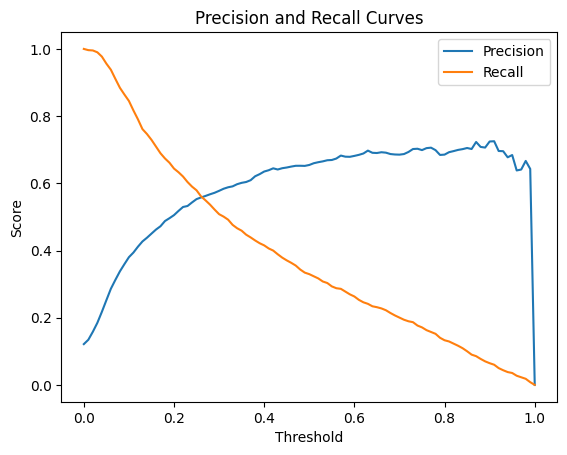

In [33]:
plt.plot(thresholds, precision_scores_list, label= 'Precision')
plt.plot(thresholds, recall_scores_list, label= 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall Curves')
plt.legend()
plt.show()

In [37]:
# Ans 3:
intersection_threshold = None
min_diff = float('inf')

for i in range(len(thresholds)):
    diff = abs(precision_scores_list[i] - recall_scores_list[i])
    if diff < min_diff:
        min_diff = diff
        intersection_threshold = thresholds[i]

print(f"Precision and recall curves intersect at approximately threshold: {intersection_threshold}")

Precision and recall curves intersect at approximately threshold: 1.0


In [41]:
precision_scores_list == recall_scores_list

for i in range(len(thresholds)):
    if precision_scores_list[i] == recall_scores_list[i]:
        print('index', i)
        print('precision', precision_scores_list[i])
        print('recall', recall_scores_list[i])
        print()
        print()

index 100
precision 0.0
recall 0.0




#### Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:
 f1 = 2 * (P * R) / (P + R)

Where 
P
 is precision and 
R
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?



In [42]:

f1_scores = []


for threshold in thresholds:
    y_pred_binary = (y_pred >= threshold).astype(int)
    precision = precision_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary)

    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    f1_scores.append(f1)


# Find the threshold with the maximum F1 score
max_f1_index = np.argmax(f1_scores)
max_f1_threshold = thresholds[max_f1_index]

print(f"The threshold with the maximum F1 score is: {max_f1_threshold:.2f}")

The threshold with the maximum F1 score is: 0.22


c:\Users\David\OneDrive\Desktop\mlzoomcamp_2024\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?

In [52]:
def train_and_evaluate(p_train, p_val, c=1.0):
# extract the y vairable
    y_train_k = (p_train.y == 'yes').astype(int)
    y_val_k = (p_val.y == 'yes').astype(int)
    
# del y column 
    del p_train['y']
    del p_val['y']
    
# encode the X vairable
    dvk = DictVectorizer(sparse = False)
    train_k_dic = p_train.to_dict(orient = 'records')
    val_k_dic = p_val.to_dict(orient = 'records')
    X_train_k = dvk.fit_transform(train_k_dic)
    X_val_k = dvk.transform(val_k_dic)    
     
# Train the model
    model =  LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    model.fit(X_train_k, y_train_k) 
    
# predict
    y_pred_k = model.predict_proba(X_val_k)[:, 1]
    
# calculate AUC
    auc_k = roc_auc_score(y_val_k, y_pred_k)
    return auc_k
    

In [50]:
from sklearn.model_selection import KFold

# initiate kfold 
kf = KFold(n_splits=5, shuffle=True, random_state=1)
aucs = []

for train_idx, val_idx in kf.split(df_full_train):
    
    df_train_fold = df_full_train.iloc[train_idx]
    df_val_fold   = df_full_train.iloc[val_idx] 
    # write a def that can train each split in fold
    auc_kfold = train_and_evaluate(df_train_fold, df_val_fold)
    aucs.append(auc_kfold)
    
print(f"AUC scores for each fold: {aucs}")
kfold_std = np.std(aucs)    
print(f'The std is : ({round(kfold_std,3)})')    

AUC scores for each fold: [np.float64(0.8993733054494373), np.float64(0.898944421423942), np.float64(0.9112805043937209), np.float64(0.9081388806828126), np.float64(0.9119843456804715)]
The std is : 0.005691215739889739


In [51]:
round(kfold_std,3)

np.float64(0.006)

#### Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.000001, 0.001, 1]
- Initialize KFold with the same parameters as previously
- Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

In [53]:
# Ans 6

c_values = [0.000001, 0.001, 1]

kfc = KFold(n_splits=5, shuffle=True, random_state=1)
result = {}

for c in c_values:
# for each c value
    aucs = []
    for train_idx, val_idx in kfc.split(df_full_train):
    
        df_train_fold = df_full_train.iloc[train_idx]
        df_val_fold   = df_full_train.iloc[val_idx] 
    # write a def that can train each split in fold
        auc_kfold = train_and_evaluate(df_train_fold, df_val_fold, c)
        aucs.append(auc_kfold)
    
    result[c] = (round(np.mean(aucs), 3), round(np.std(aucs), 3))
best_c = max(result, key=lambda k: result[k][0])    
print(f"Best C: {best_c}, Mean AUC: {result[best_c][0]}, Std AUC:{result[best_c][1]}")
# kfold_std = np.std(aucs)    
# print(f'The std is : ({round(kfold_std,3)})')    
    

Best C: 1, Mean AUC: 0.906, Std AUC:0.006


In [54]:
result[0][1] 

{1e-06: (np.float64(0.701), np.float64(0.009)),
 0.001: (np.float64(0.861), np.float64(0.007)),
 1: (np.float64(0.906), np.float64(0.006))}

In [59]:
result[1]

(np.float64(0.906), np.float64(0.006))